In [12]:
from tqdm import tqdm
import pyarrow.parquet as pq
import random
import sys
from bisect import bisect_right
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/NEMO/src/')
import importlib
from predict import *
from plot import *
importlib.reload(sys.modules['predict'])
importlib.reload(sys.modules['plot'])
from predict import *
from plot import *

In [2]:
dt_outpath = '../data/'
fig_outpath = '../figures/'

In [3]:
gtfFile = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/Saccharomyces_cerevisiae.R64-1-1.109.gtf'

In [31]:
all_genes = {'zz-YIL161W':'chrIX:38868-40068', 'cln2':'chrXVI:66400-67550', 'nup170':'chrII:74300-75800', 'fex2': 'chrXVI:13765-14965'}

### plot figure legend

In [43]:
(R,G,B) = colorMap(palette = 'viridis', log_scale=False)

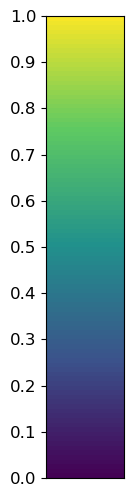

In [57]:
fig, axis = plt.subplots(figsize = (1,6))
bottom=0
y_ticks, y_tick_labels = [], []
for i in range(101):
    col=(R[i],G[i],B[i])
    rectangle = mplpatches.Rectangle([0, bottom], 1, 1, facecolor = col, linewidth = 0, alpha=1)
    axis.add_patch(rectangle)
    if i%10 == 0:
        y_ticks.append(bottom)
        y_tick_labels.append(str(i/100))
    bottom +=1
axis.set_ylim(0, 100)
axis.set_xlim(0,1)
axis.set_yticks(ticks = y_ticks, labels=y_tick_labels)
axis.set_xticks([], [])
plt.savefig(fig_outpath+f'4_mod_track_figure_legend.pdf', bbox_inches='tight')

### chromatin data

In [25]:
labels = ['240905_dorado_20190429_chrom', '240905_dorado_20210615_chrom', '240905_dorado_202205_sphe_chrom']
chrom_190429_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240912_dorado_20190429_chrom.tsv'
chrom_210615_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240917_dorado_20210615_full.tsv'
chrom_sphe_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_sphe_using_nuclei_model.tsv'
all_chrom = [chrom_190429_pred, chrom_210615_pred, chrom_sphe_pred]

plotting zz-YIL161W with 240905_dorado_20190429_chrom ...
preprocessing input matrix...
number of reads before filtering: 48
number of reads kept: 33
filtering hyper-methylated reads...
number of reads kept: 33
writing output to file:  ../data/5_240905_dorado_20190429_chrom_zz-YIL161W_chrIX:38868-40068.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...
preprocessing input matrix...
number of reads before filtering: 48
number of reads kept: 33
filtering hyper-methylated reads...
number of reads kept: 33
writing output to file:  ../data/5_240905_dorado_20190429_chrom_zz-YIL161W_chrIX:38868-40068.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...
plotting zz-YIL161W with 240905_dorado_20210615_chrom ...
preprocessing input matrix...
number of reads before filtering: 203
number of reads kept: 42
filtering hyper-methylated reads...
numbe

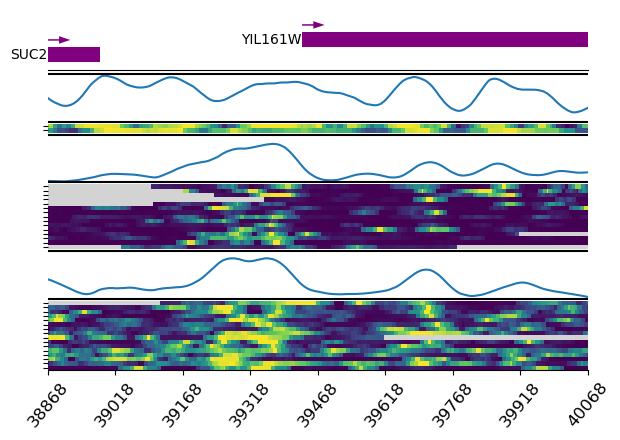

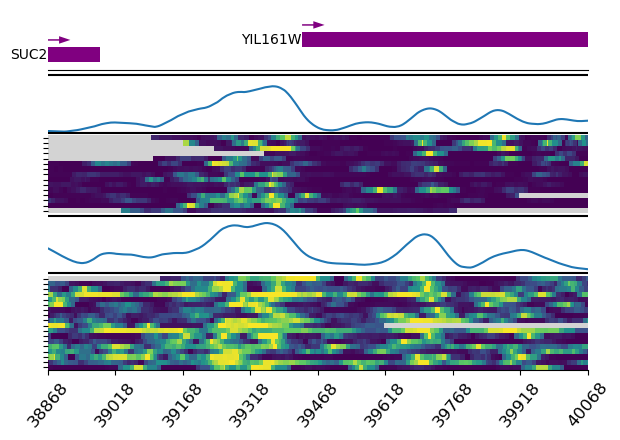

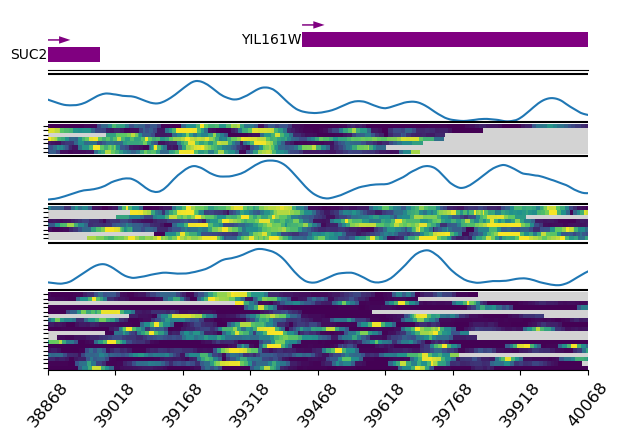

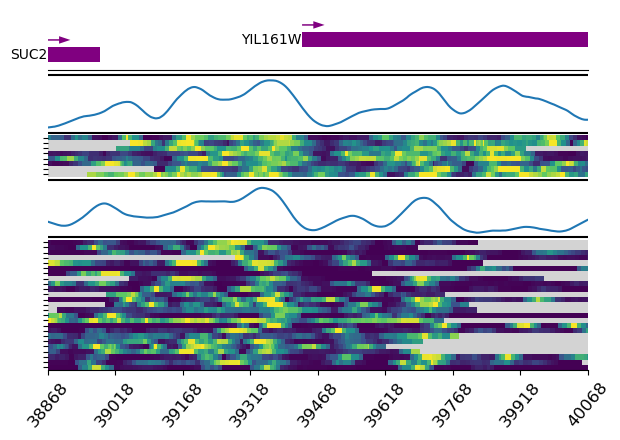

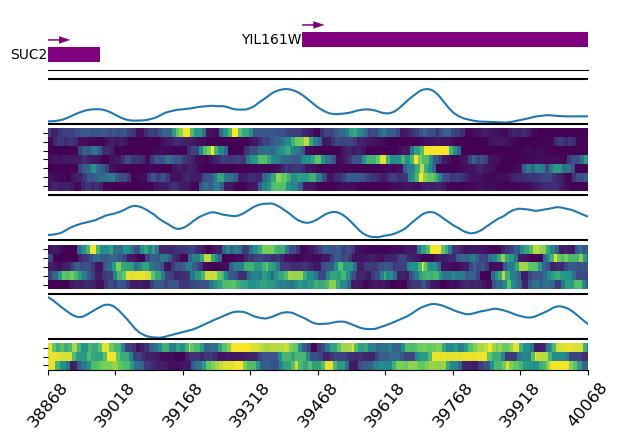

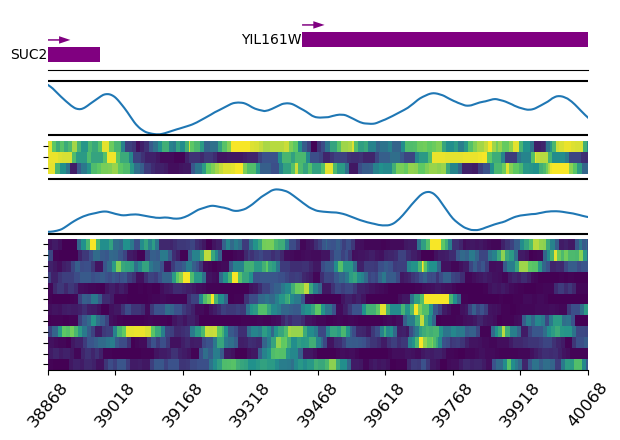

In [32]:
for geneid in all_genes:
    for i in range(len(all_chrom)):
        predfile = all_chrom[i]
        prefix = labels[i]
        print(f'plotting {geneid} with {prefix} ...')
        plotModTrack(predfile, all_genes[geneid], ncluster=3, outpath=dt_outpath, prefix= f'5_{prefix}_{geneid}', gtfFile=gtfFile, xticks_space = 150, na_thred=0.4)
        plotModTrack(predfile, all_genes[geneid], ncluster=2, outpath=dt_outpath, prefix= f'5_{prefix}_{geneid}', gtfFile=gtfFile, xticks_space = 150, na_thred=0.4)

## rdn locus